In [127]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from cycler import cycler
import os

def configure_scientific_style():
    """Configure matplotlib for scientific publication quality plots."""
    # Create output directory if it doesn't exist
    os.makedirs("figures", exist_ok=True)
    
    # Set up a scientific style with smoke gray background
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Define a color-blind friendly scientific color palette
    # Based on ColorBrewer and scientific publication standards
    scientific_colors = ['#0173B2', '#DE8F05', '#029E73', '#D55E00', 
                        '#CC78BC', '#CA9161', '#FBAFE4', '#949494', 
                        '#ECE133', '#56B4E9']
    
    plt.rcParams['axes.prop_cycle'] = cycler(color=scientific_colors)
    plt.rcParams['figure.facecolor'] = "#FFFFFF"  # Smoke gray background
    plt.rcParams['axes.facecolor'] = '#F5F5F5'    # Smoke gray background
    plt.rcParams['savefig.facecolor'] = '#F5F5F5' # Smoke gray background
    plt.rcParams['grid.color'] = '#CCCCCC'        # Light gray grid
    plt.rcParams['font.family'] = 'serif'         # Standard serif font for academic publishing
    plt.rcParams['font.size'] = 20                # Professional font size
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20
    plt.rcParams['legend.fontsize'] = 20
    plt.rcParams['figure.titlesize'] = 24

def exponential_decay(x, a, b, c):
    """Exponential decay function: y = a * exp(-b * x) + c"""
    return a * np.exp(-b * x) + c

def linear_fit(x, m, b):
    """Linear function: y = mx + b"""
    return m * x + b

# Define additional curve functions
def power_law(x, a, b, c):
    """Power law: y = a * x^(-b) + c"""
    return a * np.power(x, -b) + c

def logarithmic_decay(x, a, b, c):
    """Logarithmic decay: y = a * log(b * x + 1) + c"""
    return a * np.log(b * x + 1) + c

def double_exponential(x, a, b, c, d, e):
    """Double exponential: y = a * exp(-b * x) + c * exp(-d * x) + e"""
    return a * np.exp(-b * x) + c * np.exp(-d * x) + e

def stretched_exponential(x, a, b, c, d):
    """Stretched exponential: y = a * exp(-(b * x)^c) + d"""
    return a * np.exp(-np.power(b * x, c)) + d

def polynomial_2(x, a, b, c):
    """Quadratic: y = a * x^2 + b * x + c"""
    return a * x**2 + b * x + c

def polynomial_3(x, a, b, c, d):
    """Cubic: y = a * x^3 + b * x^2 + c * x + d"""
    return a * x**3 + b * x**2 + c * x + d

def rational_function(x, a, b, c, d):
    """Rational function: y = (a * x + b) / (c * x + d)"""
    return (a * x + b) / (c * x + d)

def gaussian_decay(x, a, b, c, d):
    """Gaussian decay: y = a * exp(-((x - b) / c)^2) + d"""
    return a * np.exp(-((x - b) / c)**2) + d

def hyperbolic(x, a, b, c):
    """Hyperbolic: y = a / (x + b) + c"""
    return a / (x + b) + c

def sigmoid(x, a, b, c, d):
    """Sigmoid: y = a / (1 + exp(-b * (x - c))) + d"""
    return a / (1 + np.exp(-b * (x - c))) + d

# Periodic and oscillatory functions
def damped_oscillation(x, a, b, c, d, e):
    """Damped oscillation: y = a * exp(-b * x) * cos(c * x + d) + e"""
    return a * np.exp(-b * x) * np.cos(c * x + d) + e

def sine_decay(x, a, b, c, d, e):
    """Sine with exponential decay: y = a * exp(-b * x) * sin(c * x + d) + e"""
    return a * np.exp(-b * x) * np.sin(c * x + d) + e

def periodic_exponential(x, a, b, c, d, e, f):
    """Periodic exponential: y = a * exp(-b * x) * (1 + c * cos(d * x + e)) + f"""
    return a * np.exp(-b * x) * (1 + c * np.cos(d * x + e)) + f

def oscillating_power_law(x, a, b, c, d, e):
    """Oscillating power law: y = a * x^(-b) * cos(c * x + d) + e"""
    return a * np.power(x, -b) * np.cos(c * x + d) + e

def quasi_periodic(x, a, b, c, d, e, f, g):
    """Quasi-periodic: y = a * exp(-b * x) * cos(c * x) * cos(d * x + e) + f * x + g"""
    return a * np.exp(-b * x) * np.cos(c * x) * np.cos(d * x + e) + f * x + g

def modulated_decay(x, a, b, c, d, e, f):
    """Modulated decay: y = a * exp(-b * x) * (1 + c * sin(d * x + e)) + f"""
    return a * np.exp(-b * x) * (1 + c * np.sin(d * x + e)) + f

def beating_pattern(x, a, b, c, d, e, f):
    """Beating pattern: y = a * exp(-b * x) * cos(c * x) * cos(d * x) + e * x + f"""
    return a * np.exp(-b * x) * np.cos(c * x) * np.cos(d * x) + e * x + f

def chirped_exponential(x, a, b, c, d, e, f):
    """Chirped exponential: y = a * exp(-b * x) * cos(c * x^2 + d * x + e) + f"""
    return a * np.exp(-b * x) * np.cos(c * x**2 + d * x + e) + f

def quantum_envelope(x, a, b, c, d, e):
    """Quantum envelope: y = a * (1 - exp(-b * x)) * exp(-c * x^d) + e"""
    return a * (1 - np.exp(-b * x)) * np.exp(-c * np.power(x, d)) + e

def rabi_oscillation(x, a, b, c, d, e):
    """Rabi oscillation: y = a * sin²(b * x + c) * exp(-d * x) + e"""
    return a * np.sin(b * x + c)**2 * np.exp(-d * x) + e

def ramsey_fringes(x, a, b, c, d, e, f):
    """Ramsey fringes: y = a * cos²(b * x + c) * exp(-d * x^e) + f"""
    return a * np.cos(b * x + c)**2 * np.exp(-d * np.power(x, e)) + f

# Mathematical functions with complexity
def bessel_like(x, a, b, c, d):
    """Bessel-like oscillation: y = a * cos(b * sqrt(x) + c) / sqrt(x + 1) + d"""
    return a * np.cos(b * np.sqrt(x) + c) / np.sqrt(x + 1) + d

def logarithmic_oscillation(x, a, b, c, d, e):
    """Log oscillation: y = a * cos(b * log(x + 1) + c) / (x + d) + e"""
    return a * np.cos(b * np.log(x + 1) + c) / (x + d) + e

def fractional_decay(x, a, b, c, d):
    """Fractional decay: y = a / (1 + (b * x)^c) + d"""
    return a / (1 + np.power(b * x, c)) + d

def inverse_polynomial(x, a, b, c, d):
    """Inverse polynomial: y = a / (b * x^2 + c * x + 1) + d"""
    return a / (b * x**2 + c * x + 1) + d

def tanh_decay(x, a, b, c, d):
    """Hyperbolic tangent decay: y = a * tanh(b / (x + c)) + d"""
    return a * np.tanh(b / (x + c)) + d

def sinc_like(x, a, b, c, d):
    """Sinc-like function: y = a * sin(b * x + c) / (b * x + c + 0.1) + d"""
    return a * np.sin(b * x + c) / (b * x + c + 0.1) + d

# Multi-component functions
def three_exponential(x, a1, b1, a2, b2, a3, b3, c):
    """Triple exponential: y = a1*exp(-b1*x) + a2*exp(-b2*x) + a3*exp(-b3*x) + c"""
    return a1 * np.exp(-b1 * x) + a2 * np.exp(-b2 * x) + a3 * np.exp(-b3 * x) + c

def mixed_power_exp(x, a, b, c, d, e, f):
    """Mixed power-exponential: y = a * x^(-b) * exp(-c * x^d) + e * x + f"""
    return a * np.power(x, -b) * np.exp(-c * np.power(x, d)) + e * x + f

def oscillating_rational(x, a, b, c, d, e, f):
    """Oscillating rational: y = (a * cos(b * x + c) + d) / (e * x + f)"""
    return (a * np.cos(b * x + c) + d) / (e * x + f)





def analyze_exponential_decay(filename, fit_type='exponential'):
    
    # Load data
    with open(filename, 'r') as f:
        data = json.load(f)
    
    configure_scientific_style()
    
    # Store results
    r_squared_values = {}
    decay_rates = {}
    
    # Analyze each ansatz
    for ansatz_id, variances in data.items():
        cycles = np.array([int(k) for k in variances.keys()])
        variance_values = np.array(list(variances.values()))
        
        # Remove any zero or negative values for fitting
        positive_mask = variance_values > 0
        cycles_pos = cycles[positive_mask]
        variance_pos = variance_values[positive_mask]
        
        if len(variance_pos) > 3:  # Need enough points for fitting
            try:
                # Extended fitting function
                if fit_type == "exponential":
                    initial_guess = [max(variance_pos), 0.5, min(variance_pos)/10]
                    popt, _ = curve_fit(exponential_decay, cycles_pos, variance_pos, 
                                    p0=initial_guess, maxfev=10000)
                    y_pred = exponential_decay(cycles_pos, *popt)

                elif fit_type == "power_law":
                    initial_guess = [max(variance_pos), 1.0, min(variance_pos)/10]
                    popt, _ = curve_fit(power_law, cycles_pos, variance_pos, 
                                    p0=initial_guess, maxfev=10000)
                    y_pred = power_law(cycles_pos, *popt)

                elif fit_type == "logarithmic":
                    initial_guess = [-max(variance_pos)/10, 1.0, max(variance_pos)]
                    popt, _ = curve_fit(logarithmic_decay, cycles_pos, variance_pos, 
                                    p0=initial_guess, maxfev=10000)
                    y_pred = logarithmic_decay(cycles_pos, *popt)

                elif fit_type == "double_exponential":
                    initial_guess = [max(variance_pos)/2, 0.5, max(variance_pos)/2, 0.1, min(variance_pos)/10]
                    popt, _ = curve_fit(double_exponential, cycles_pos, variance_pos, 
                                    p0=initial_guess, maxfev=10000)
                    y_pred = double_exponential(cycles_pos, *popt)

                elif fit_type == "stretched_exponential":
                    initial_guess = [max(variance_pos), 0.5, 1.0, min(variance_pos)/10]
                    popt, _ = curve_fit(stretched_exponential, cycles_pos, variance_pos, 
                                    p0=initial_guess, maxfev=10000)
                    y_pred = stretched_exponential(cycles_pos, *popt)

                elif fit_type == "polynomial_2":
                    initial_guess = [0, -1, max(variance_pos)]
                    popt, _ = curve_fit(polynomial_2, cycles_pos, variance_pos, 
                                    p0=initial_guess, maxfev=10000)
                    y_pred = polynomial_2(cycles_pos, *popt)

                elif fit_type == "polynomial_3":
                    initial_guess = [0, 0, -1, max(variance_pos)]
                    popt, _ = curve_fit(polynomial_3, cycles_pos, variance_pos, 
                                    p0=initial_guess, maxfev=10000)
                    y_pred = polynomial_3(cycles_pos, *popt)

                elif fit_type == "hyperbolic":
                    initial_guess = [max(variance_pos) * max(cycles_pos), 1.0, min(variance_pos)/10]
                    popt, _ = curve_fit(hyperbolic, cycles_pos, variance_pos, 
                                    p0=initial_guess, maxfev=10000)
                    y_pred = hyperbolic(cycles_pos, *popt)

                elif fit_type == "gaussian_decay":
                    initial_guess = [max(variance_pos), np.mean(cycles_pos), np.std(cycles_pos), min(variance_pos)/10]
                    popt, _ = curve_fit(gaussian_decay, cycles_pos, variance_pos, 
                                    p0=initial_guess, maxfev=10000)
                    y_pred = gaussian_decay(cycles_pos, *popt)

                elif fit_type == "sigmoid":
                    initial_guess = [max(variance_pos) - min(variance_pos), -0.5, np.mean(cycles_pos), min(variance_pos)]
                    popt, _ = curve_fit(sigmoid, cycles_pos, variance_pos, 
                                    p0=initial_guess, maxfev=10000)
                    y_pred = sigmoid(cycles_pos, *popt)

                elif fit_type == "linear":
                    popt, _ = curve_fit(linear_fit, cycles_pos, variance_pos, 
                                    p0=[1, 0], maxfev=10000)
                    y_pred = linear_fit(cycles_pos, *popt)
                
                elif fit_type == "damped_oscillation":
                    # Good initial guess for quantum circuits
                    freq_guess = 2 * np.pi / (max(cycles_pos) - min(cycles_pos))  # One oscillation over range
                    initial_guess = [max(variance_pos), 0.1, freq_guess, 0, min(variance_pos)]
                    try:
                        popt, _ = curve_fit(damped_oscillation, cycles_pos, variance_pos, 
                                        p0=initial_guess, maxfev=10000)
                        y_pred = damped_oscillation(cycles_pos, *popt)
                    except:
                        # Fallback to linear if fit fails
                        popt, _ = curve_fit(linear_fit, cycles_pos, variance_pos, p0=[1, 0])
                        y_pred = linear_fit(cycles_pos, *popt)

                elif fit_type == "sine_decay":
                    freq_guess = 2 * np.pi / (max(cycles_pos) - min(cycles_pos))
                    initial_guess = [max(variance_pos), 0.1, freq_guess, 0, min(variance_pos)]
                    try:
                        popt, _ = curve_fit(sine_decay, cycles_pos, variance_pos, 
                                        p0=initial_guess, maxfev=10000)
                        y_pred = sine_decay(cycles_pos, *popt)
                    except:
                        popt, _ = curve_fit(linear_fit, cycles_pos, variance_pos, p0=[1, 0])
                        y_pred = linear_fit(cycles_pos, *popt)

                elif fit_type == "periodic_exponential":
                    freq_guess = 2 * np.pi / (max(cycles_pos) - min(cycles_pos))
                    initial_guess = [max(variance_pos), 0.1, 0.3, freq_guess, 0, min(variance_pos)]
                    try:
                        popt, _ = curve_fit(periodic_exponential, cycles_pos, variance_pos, 
                                        p0=initial_guess, maxfev=10000)
                        y_pred = periodic_exponential(cycles_pos, *popt)
                    except:
                        popt, _ = curve_fit(linear_fit, cycles_pos, variance_pos, p0=[1, 0])
                        y_pred = linear_fit(cycles_pos, *popt)

                elif fit_type == "modulated_decay":
                    freq_guess = 2 * np.pi / (max(cycles_pos) - min(cycles_pos))
                    initial_guess = [max(variance_pos), 0.1, 0.3, freq_guess, 0, min(variance_pos)]
                    try:
                        popt, _ = curve_fit(modulated_decay, cycles_pos, variance_pos, 
                                        p0=initial_guess, maxfev=10000)
                        y_pred = modulated_decay(cycles_pos, *popt)
                    except:
                        popt, _ = curve_fit(linear_fit, cycles_pos, variance_pos, p0=[1, 0])
                        y_pred = linear_fit(cycles_pos, *popt)

                elif fit_type == "quantum_envelope":
                    initial_guess = [max(variance_pos), 1.0, 0.1, 1.0, min(variance_pos)]
                    try:
                        popt, _ = curve_fit(quantum_envelope, cycles_pos, variance_pos, 
                                        p0=initial_guess, maxfev=15000)
                        y_pred = quantum_envelope(cycles_pos, *popt)
                    except:
                        popt, _ = curve_fit(linear_fit, cycles_pos, variance_pos, p0=[1, 0])
                        y_pred = linear_fit(cycles_pos, *popt)

                elif fit_type == "rabi_oscillation":
                    freq_guess = np.pi / (max(cycles_pos) - min(cycles_pos))
                    initial_guess = [max(variance_pos), freq_guess, 0, 0.1, min(variance_pos)]
                    try:
                        popt, _ = curve_fit(rabi_oscillation, cycles_pos, variance_pos, 
                                        p0=initial_guess, maxfev=15000)
                        y_pred = rabi_oscillation(cycles_pos, *popt)
                    except:
                        popt, _ = curve_fit(linear_fit, cycles_pos, variance_pos, p0=[1, 0])
                        y_pred = linear_fit(cycles_pos, *popt)

                elif fit_type == "fractional_decay":
                    initial_guess = [max(variance_pos), 1.0, 1.5, min(variance_pos)]
                    try:
                        popt, _ = curve_fit(fractional_decay, cycles_pos, variance_pos, 
                                        p0=initial_guess, maxfev=15000)
                        y_pred = fractional_decay(cycles_pos, *popt)
                    except:
                        popt, _ = curve_fit(linear_fit, cycles_pos, variance_pos, p0=[1, 0])
                        y_pred = linear_fit(cycles_pos, *popt)

                elif fit_type == "three_exponential":
                    amp_guess = max(variance_pos) / 3
                    initial_guess = [amp_guess, 0.1, amp_guess, 0.5, amp_guess, 2.0, min(variance_pos)]
                    try:
                        popt, _ = curve_fit(three_exponential, cycles_pos, variance_pos, 
                                        p0=initial_guess, maxfev=20000)
                        y_pred = three_exponential(cycles_pos, *popt)
                    except:
                        popt, _ = curve_fit(linear_fit, cycles_pos, variance_pos, p0=[1, 0])
                        y_pred = linear_fit(cycles_pos, *popt)


                
                ss_res = np.sum((variance_pos - y_pred) ** 2)
                ss_tot = np.sum((variance_pos - np.mean(variance_pos)) ** 2)
                r_squared = 1 - (ss_res / ss_tot)
                
                r_squared_values[int(ansatz_id)] = r_squared
                decay_rates[int(ansatz_id)] = popt[1]  # decay rate parameter
                
            except Exception as e:
                print(f"Failed to fit ansatz {ansatz_id}: {e}")
    
    return r_squared_values, decay_rates

def create_analysis_plot(r_squared_values, depth):
    """Create visualization of exponential decay analysis - R² values only."""
    
    # Sort by ansatz ID for consistent plotting
    ansatz_ids = sorted(r_squared_values.keys())
    r_squared_vals = [r_squared_values[aid] for aid in ansatz_ids]
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Color coding based on R^2 quality
    colors = []
    for r2 in r_squared_vals:
        if r2 > 0.9:
            colors.append('#029E73')  # Green - Excellent
        elif r2 > 0.8:
            colors.append('#0173B2')  # Blue - Good
        elif r2 > 0.6:
            colors.append('#DE8F05')  # Orange - Moderate
        else:
            colors.append('#D55E00')  # Red - Poor
    
    # Plot R² values with quality thresholds
    bars = ax.bar(ansatz_ids, r_squared_vals, color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
    
    # Add quality threshold lines
    ax.axhline(y=0.9, color='#029E73', linestyle='--', alpha=0.7, label='Excellent (R² > 0.9)')
    ax.axhline(y=0.8, color='#0173B2', linestyle='--', alpha=0.7, label='Good (R² > 0.8)')
    ax.axhline(y=0.6, color='#DE8F05', linestyle='--', alpha=0.7, label='Moderate (R² > 0.6)')
    
    ax.set_xlabel('Ansatz ID', fontweight='bold')
    ax.set_ylabel('Coefficient of Determination (R²)', fontweight='bold')
    #ax.set_title('Exponential Fit Quality Assessment', fontweight='bold')
    ax.set_ylim(0, 1.05)
    #ax.legend(loc='lower right', framealpha=0.9)
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_xticks(ansatz_ids)
    
    # Add R² values on bars
    for bar, r2 in zip(bars, r_squared_vals):
        height = bar.get_height()
        if height > 0.10:
            ax.text(bar.get_x() + bar.get_width()/2, height - 0.1,
                f'{r2:.3f}', ha='center', va='bottom', fontsize=16, rotation=90)
        else:
            ax.text(bar.get_x() + bar.get_width()/2, height + 0.02,
                f'{r2:.3f}', ha='center', va='bottom', fontsize=16, rotation=90)
    
    plt.tight_layout()
    plt.savefig(f'figures/exponential_decay_analysis_depth_{depth}_amplitude.png', dpi=300, bbox_inches='tight')
    plt.show()

def main():
    """Main analysis function."""
    embeddings = ["angle_embedding", "amplitude_embedding"]
    depth = 2
    embedding = embeddings[1]
    fit_types = {
                0: "exponential",
                1: "power_law", 
                2: "logarithmic", 
                3: "double_exponential", 
                4: "stretched_exponential", 
                5: "polynomial_2", 
                6: "polynomial_3", 
                7: "hyperbolic", 
                8: "gaussian_decay", 
                9: "sigmoid", 
                10: "linear",
                11: "damped_oscillation", 
                12: "sine_decay", 
                13: "periodic_exponential",
                14: "modulated_decay", 
                15: "beating_pattern", 
                16: "chirped_exponential",
                17: "quantum_envelope", 
                18: "rabi_oscillation", 
                19: "ramsey_fringes",
                20: "bessel_like", 
                21: "logarithmic_oscillation", 
                22: "fractional_decay",
                23: "inverse_polynomial", 
                24: "tanh_decay", 
                25: "sinc_like",
                26: "three_exponential", 
                27: "mixed_power_exp", 
                28: "oscillating_rational"
            }
    fit_type = fit_types[2]  # Choose the desired fit type
    filename = f'..//{embedding}_depth_{depth}.json'
    
    # Perform exponential decay analysis
    r_squared_values, decay_rates = analyze_exponential_decay(filename, fit_type=fit_type)
    
    # Create visualization (single plot only)
    create_analysis_plot(r_squared_values, depth)

/tmp/ipykernel_10612/3121091014.py:51: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x + 1) + c


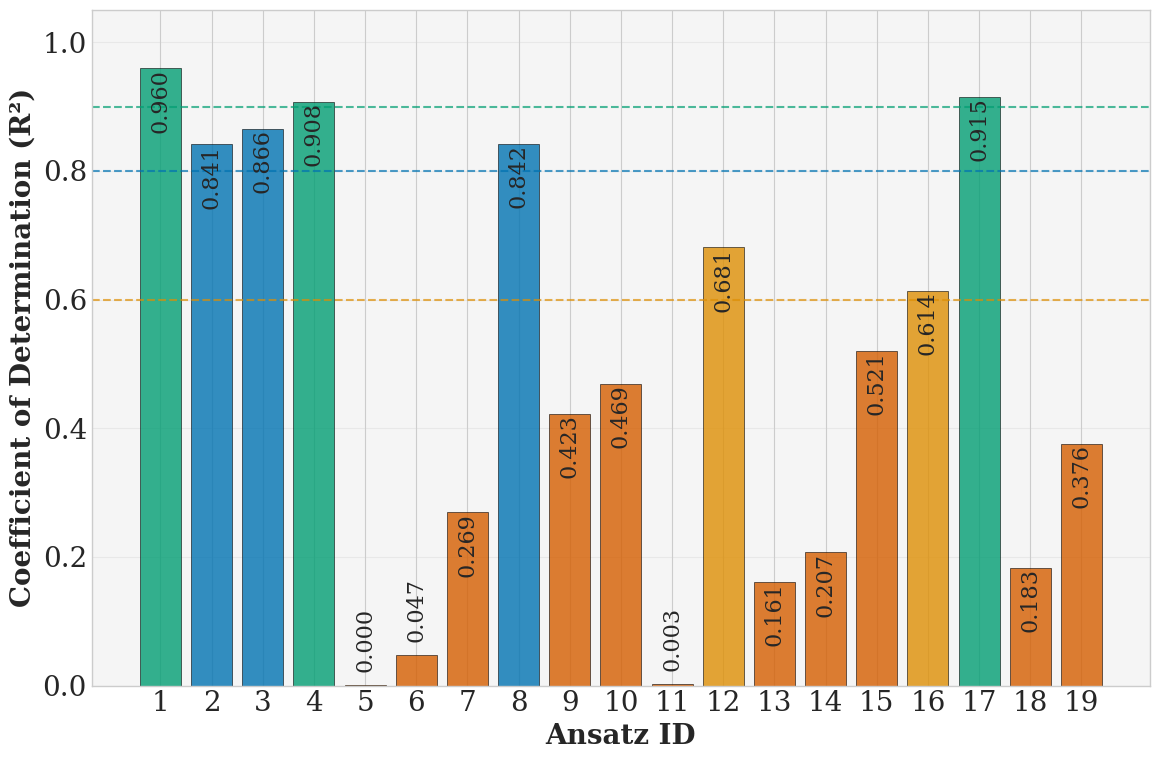

In [128]:
main()